# LSTM Stock Prediction Model
By Joshua Jenkins

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.utils import plot_model
import yfinance as yf

In [62]:
#Get the Dataset
ticker = input("Enter ticker: ")
start_date = input("Enter start date in format YYYY-MM-DD: ")
end_date = date.today().strftime("%Y-%m-%d")
data = yf.download(ticker, start=start_date, end=end_date)

# Save the data to a CSV file
data.to_csv("Ticker.csv")
df=pd.read_csv("Ticker.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df["Date"] = pd.to_datetime(df.index,format='%Y-%m-%d')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,155.093704,22622100,2020-01-02
2020-01-03,158.320007,159.949997,158.059998,158.619995,153.162506,21116200,2020-01-03
2020-01-06,157.080002,159.100006,156.509995,159.029999,153.558380,20813700,2020-01-06
2020-01-07,159.320007,159.669998,157.320007,157.580002,152.158279,21634100,2020-01-07
2020-01-08,158.929993,160.800003,157.949997,160.089996,154.581940,27746500,2020-01-08


In [63]:
#Print the shape of Dataframe and check for null values
print("Dataframe Shape:",df.shape)
print("Null Values (if any):",df.isnull().values.any())


Dataframe Shape: (964, 7)
Null Values (if any): False


<Axes: title={'center': 'Microsoft Stock Price'}, xlabel='Date', ylabel='Price (USD)'>

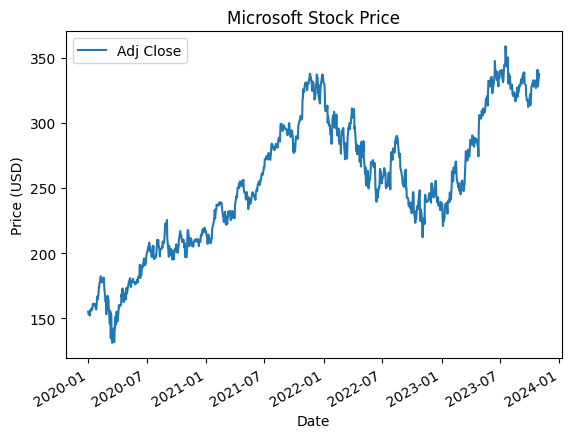

In [64]:
#Plot the closing price of the stock
df.plot(x='Date',y='Adj Close', xlabel = 'Date', ylabel = 'Price (USD)', title = 'Microsoft Stock Price')

In [65]:
#Set target variable as the closing price
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the features
features = ['Open','High','Low','Volume']

In [66]:
#Setting up scaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(data=feature_transform, columns=features, index=df.index)
feature_transform.head()
feature_transform

,Open,High,Low,Volume
Date,,,,
2020-01-02,0.096868,0.089121,0.117361,0.152841
2020-01-03,0.094821,0.085673,0.116133,0.135692
2020-01-06,0.089303,0.081915,0.109085,0.132247
2020-01-07,0.099270,0.084435,0.112768,0.141590
2020-01-08,0.097535,0.089430,0.115633,0.211198
...,...,...,...,...
2023-10-24,0.864510,0.845542,0.887050,0.249998
2023-10-25,0.925558,0.909023,0.932612,0.522173
2023-10-26,0.905624,0.888820,0.884049,0.326012


In [67]:
#Splitting to train and test set
timesplit = TimeSeriesSplit(n_splits=10)#?
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
    Y_train, Y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [68]:
#Data Proessing for LSTM
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
X_test = testX.reshape(testX.shape[0], 1, testX.shape[1])


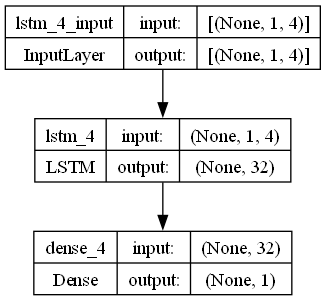

In [69]:
#LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes = True, show_layer_names =True)

In [70]:
#Training the Model
lstm.fit(X_train, Y_train, epochs=200, batch_size=8, verbose=1, shuffle=False)

Epoch 1/200
110/110 [==============================] - 1s 1ms/step - loss: 62917.1719
Epoch 2/200
110/110 [==============================] - 0s 1ms/step - loss: 61955.7266
Epoch 3/200
110/110 [==============================] - 0s 1ms/step - loss: 59626.1484
Epoch 4/200
110/110 [==============================] - 0s 1ms/step - loss: 55526.1484
Epoch 5/200
110/110 [==============================] - 0s 1ms/step - loss: 49953.8438
Epoch 6/200
110/110 [==============================] - 0s 1ms/step - loss: 43524.8086
Epoch 7/200
110/110 [==============================] - 0s 1ms/step - loss: 36796.3906
Epoch 8/200
110/110 [==============================] - 0s 1ms/step - loss: 30191.4824
Epoch 9/200
110/110 [==============================] - 0s 1ms/step - loss: 24016.9902
Epoch 10/200
110/110 [==============================] - 0s 1ms/step - loss: 18486.8320
Epoch 11/200
110/110 [==============================] - 0s 1ms/step - loss: 13735.2119
Epoch 12/200
110/110 [==============================

In [71]:
#Prediction
Y_pred = lstm.predict(X_test)
Y_pred

3/3 [==============================] - 0s 1ms/step


array([[336.3191 ],
       [335.26562],
       [340.11475],
       [339.77145],
       [338.0614 ],
       [339.41876],
       [340.22638],
       [332.944  ],
       [330.87732],
       [338.80276],
       [341.72983],
       [348.7299 ],
       [345.88953],
       [352.40186],
       [359.76566],
       [353.1352 ],
       [346.87143],
       [345.9206 ],
       [348.9461 ],
       [340.15826],
       [337.3136 ],
       [336.4237 ],
       [336.70703],
       [336.6404 ],
       [331.67004],
       [327.98083],
       [332.01157],
       [329.71286],
       [326.75006],
       [325.30597],
       [325.6242 ],
       [321.1167 ],
       [322.38037],
       [323.53888],
       [322.2092 ],
       [319.90204],
       [315.102  ],
       [319.7179 ],
       [324.84952],
       [326.13385],
       [328.8249 ],
       [322.3506 ],
       [325.0269 ],
       [324.88626],
       [328.96997],
       [329.56757],
       [330.6394 ],
       [331.60635],
       [333.37677],
       [331.83487],


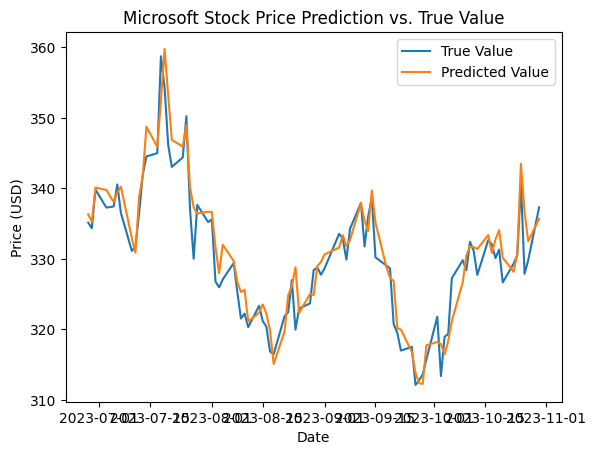

In [72]:
# Plotting the values up until today
plt.plot(df.iloc[test_index]['Date'], Y_test, label='True Value')
plt.plot(df.iloc[test_index]['Date'], Y_pred, label='Predicted Value')
plt.title('Microsoft Stock Price Prediction vs. True Value')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [73]:
# Fetch the latest data and making a future prediction
latest_data = df.iloc[-1][features].values.reshape(1, len(features))
latest_data_scaled = scaler.transform(latest_data.reshape(1, -1))
next_day_prediction = lstm.predict(latest_data_scaled.reshape(1, 1, len(features)))
next_day = df.index[-1] + pd.Timedelta(days=1)
print("Predicted Stock Price for " + next_day.strftime('%Y-%m-%d') + ":", next_day_prediction[0, 0])

1/1 [==============================] - 0s 17ms/step
Predicted Stock Price for 2023-10-31: 335.68192


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


C:\Users\dajoe\AppData\Local\Temp\ipykernel_26512\3369103146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_week_df['Date'] = last_week_df.index.strftime('%m-%d')


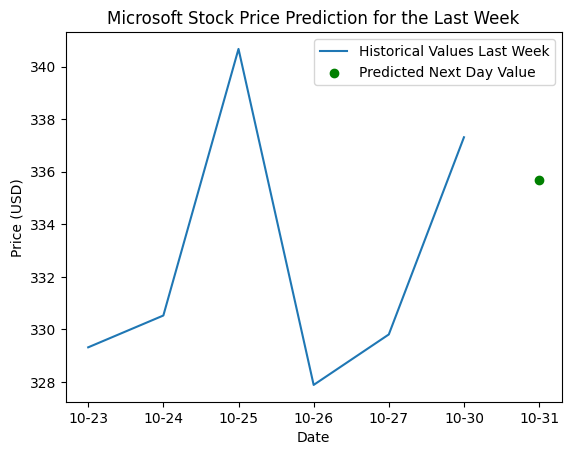

In [74]:
# Filter the dataframe to include only the last week of data
last_week_df = df.loc[df.index >= df.index[-1] - pd.DateOffset(weeks=1)]
last_week_df['Date'] = last_week_df.index.strftime('%m-%d')

# Plot the predicted value along with the previous values for the last week
plt.plot(last_week_df['Date'], last_week_df['Adj Close'], label='Historical Values Last Week')
plt.scatter(next_day.strftime('%m-%d'), next_day_prediction, color='g', label='Predicted Next Day Value')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Microsoft Stock Price Prediction for the Last Week")
plt.legend()
plt.show()
